## Конкурс Сбербанка (sdsj)

### первая задача 

Александр Дьяконов, 2016

Финальное решение (для сабмита)

In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

/home/alexander/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/alexander/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/home/alexander/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## загрузка и преобразование данных

In [2]:
transactions = pd.read_csv('transactions.csv')
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('tr_types.csv', sep=';')
customers_gender_train = pd.read_csv('customers_gender_train.csv')

transactions['num_day'] = transactions['tr_datetime'].apply(lambda x: int(x.split(' ')[0]))
transactions['datetime'] = transactions['tr_datetime'].apply(lambda x: x.split(' ')[1])
transactions['hour'] = transactions['datetime'].apply(lambda x: int(x.split(':')[0]))
transactions['minute'] = transactions['datetime'].apply(lambda x: int(x.split(':')[1]))
transactions['second'] = transactions['datetime'].apply(lambda x: int(x.split(':')[2]))
del transactions['tr_datetime']
# день недели
transactions['dayofweek'] = transactions['num_day'].apply(lambda x: (x + 4) % 7)

from datetime import datetime

def numday2realdate(x):
    return (datetime.fromordinal(735446 + x).strftime('%Y-%m-%d'))

transactions['realdate'] = transactions.num_day.map(numday2realdate)
transactions.realdate = pd.to_datetime(transactions.realdate)
transactions['month'] = transactions.realdate.dt.month
transactions['year'] = transactions.realdate.dt.year
transactions['month_num'] = (transactions.month - 12)*(transactions.year==2014) +  (transactions.month )*(transactions.year==2015)
transactions[:5]

,customer_id,mcc_code,tr_type,amount,term_id,num_day,datetime,hour,minute,second,dayofweek,realdate,month,year,month_num
0,39026145,4814,1030,-2245.92,NaN,0,10:23:26,10,23,26,4,2014-08-01,8,2014,-4
1,39026145,6011,7010,56147.89,NaN,1,10:19:29,10,19,29,5,2014-08-02,8,2014,-4
2,39026145,4829,2330,-56147.89,NaN,1,10:20:56,10,20,56,5,2014-08-02,8,2014,-4
3,39026145,5499,1010,-1392.47,NaN,1,10:39:54,10,39,54,5,2014-08-02,8,2014,-4
4,39026145,5499,1010,-920.83,NaN,2,15:33:42,15,33,42,6,2014-08-03,8,2014,-4


## формирование признакового пространства

In [3]:
def mymerge(customers_gender_train, dct):
    X = customers_gender_train.copy()
    for name, x in dct.items():
        xt = x.copy()
        xt.columns = [name + '_' + str(q) if q != u'customer_id' else 'customer_id' for q in x.columns]
        print (name, xt.shape)
        X = pd.merge(X, xt, how='left')
    return (X)

transactions['tr_type2'] = transactions.tr_type
transactions.loc[~transactions.tr_type2.isin(transactions.tr_type2.value_counts().index[:50].tolist()), 'tr_type2'] = 0
transactions['stime'] = transactions.datetime == '00:00:00'
transactions['amount2'] = np.round(transactions.amount.values / (np.pi ** np.e) )

transactions['amount_p'] = 0
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-100000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-50000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-10000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-5000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-2000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-1000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-500)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<-100)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<0)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<100)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<500)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<1000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<2000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<5000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<10000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<50000)
transactions['amount_p'] = transactions['amount_p'] + (transactions['amount2']<100000)

transactions.loc[~transactions.amount2.isin(transactions.amount2.value_counts().index[:50].tolist()), 'amount2'] = 0

transactions[:5]

,customer_id,mcc_code,tr_type,amount,term_id,num_day,datetime,hour,minute,second,dayofweek,realdate,month,year,month_num,tr_type2,stime,amount2,amount_p
0,39026145,4814,1030,-2245.92,NaN,0,10:23:26,10,23,26,4,2014-08-01,8,2014,-4,1030,False,-100.0,9
1,39026145,6011,7010,56147.89,NaN,1,10:19:29,10,19,29,5,2014-08-02,8,2014,-4,7010,False,0.0,4
2,39026145,4829,2330,-56147.89,NaN,1,10:20:56,10,20,56,5,2014-08-02,8,2014,-4,2330,False,-2500.0,13
3,39026145,5499,1010,-1392.47,NaN,1,10:39:54,10,39,54,5,2014-08-02,8,2014,-4,1010,False,0.0,9
4,39026145,5499,1010,-920.83,NaN,2,15:33:42,15,33,42,6,2014-08-03,8,2014,-4,1010,False,0.0,9


In [6]:
print (transactions.shape)
transactions = pd.merge(transactions, customers_gender_train, how='left')
print (transactions.shape)

(6849346, 19)
(6849346, 20)


### Обычные признаки

In [4]:
X_mcc_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'mcc_code']).amount.count().unstack().fillna(0).reset_index()
X_tr_type_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type']).amount.count().unstack().fillna(0).reset_index()
X_hour_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'hour']).amount.count().unstack().fillna(0).reset_index()
X_month_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'month']).amount.count().unstack().fillna(0).reset_index()
X_stime_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'stime']).amount.count().unstack().fillna(0).reset_index()
X_dayofweek_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'dayofweek']).amount.count().unstack().fillna(0).reset_index()
X_amount2_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount2']).amount.count().unstack().fillna(0).reset_index()
X_tr_type2_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type2']).amount.count().unstack().fillna(0).reset_index()
X_amountp_plus = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount_p']).amount.count().unstack().fillna(0).reset_index()

X_mcc = transactions[transactions.amount < 0].groupby(['customer_id', 'mcc_code']).amount.count().unstack().fillna(0).reset_index()
X_tr_type = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type']).amount.count().unstack().fillna(0).reset_index()
X_hour = transactions[transactions.amount < 0].groupby(['customer_id', 'hour']).amount.count().unstack().fillna(0).reset_index()
X_month = transactions[transactions.amount < 0].groupby(['customer_id', 'month']).amount.count().unstack().fillna(0).reset_index()
X_stime = transactions[transactions.amount < 0].groupby(['customer_id', 'stime']).amount.count().unstack().fillna(0).reset_index()
X_dayofweek = transactions[transactions.amount < 0].groupby(['customer_id', 'dayofweek']).amount.count().unstack().fillna(0).reset_index()
X_amount2 = transactions[transactions.amount < 0].groupby(['customer_id', 'amount2']).amount.count().unstack().fillna(0).reset_index()
X_tr_type2 = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type2']).amount.count().unstack().fillna(0).reset_index()
X_amountp = transactions[transactions.amount < 0].groupby(['customer_id', 'amount_p']).amount.count().unstack().fillna(0).reset_index()

In [8]:
dct = {
        'mcc': X_mcc,
        'tr_type': X_tr_type,
        'hour': X_hour,
        'month': X_month,
        'stime': X_stime,
        'amount2': X_amount2,
        'dayofweek': X_dayofweek,
        'tr_type2': X_tr_type2,
        'amountp': X_amountp,
        'mcc_plus': X_mcc_plus,
        'tr_type_plus': X_tr_type_plus,
        'hour_plus': X_hour_plus,
        'month_plus': X_month_plus,
        'stime_plus': X_stime_plus,
        'amount2_plus': X_amount2_plus,
        'dayofweek_plus': X_dayofweek_plus,
        'tr_type2_plus': X_tr_type2_plus,
        'amountp_plus': X_amountp_plus 
       }

X = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y = X.gender.values
print(X.shape, y.shape)

del X['gender']

X2 = X.loc[np.isnan(y), :]
X = X.loc[~np.isnan(y), :]
y = y[~np.isnan(y)]

X.index = list(range(X.shape[0]))
X2.index = list(range(X2.shape[0]))

X.fillna(-1, inplace=True)
X2.fillna(-1, inplace=True)

print (X.shape, y.shape, X2.shape)

('dayofweek', (14986, 8))
('hour', (14986, 25))
('month_plus', (13793, 13))
('amount2', (14986, 41))
('tr_type', (14986, 58))
('amountp', (14986, 11))
('mcc', (14986, 185))
('month', (14986, 13))
('tr_type2_plus', (13793, 44))
('tr_type_plus', (13793, 56))
('stime', (14986, 3))
('mcc_plus', (13793, 146))
('amountp_plus', (13793, 10))
('dayofweek_plus', (13793, 8))
('amount2_plus', (13793, 13))
('hour_plus', (13793, 25))
('tr_type2', (14986, 43))
('stime_plus', (13793, 3))
((15000, 689), (15000,))
((12000, 688), (12000,), (3000, 688))


### нормированные признаки

In [9]:
X_mcc_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'mcc_code']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_hour_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'hour']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_month_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'month']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_stime_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'stime']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_dayofweek_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'dayofweek']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amount2_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'amount2']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type2_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type2']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amountp_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'amount_p']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

X_mcc_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'mcc_code']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_hour_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'hour']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_month_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'month']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_stime_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'stime']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_dayofweek_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'dayofweek']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amount2_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount2']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type2_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type2']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amountp_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount_p']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

In [14]:
dct = {
         'mcc_norm': X_mcc_norm,
         'tr_type_norm': X_tr_type_norm,
         'hour_norm': X_hour_norm,
         'month_norm': X_month_norm,
         'stime_norm': X_stime_norm,
         'amount2_norm': X_amount2_norm,
         'dayofweek_norm': X_dayofweek_norm,
         'tr_type2_norm': X_tr_type2_norm,
         'amountp_norm': X_amountp_norm,
         'mcc_plus_norm': X_mcc_plus_norm,
         'tr_type_plus_norm': X_tr_type_plus_norm,
         'hour_plus_norm': X_hour_plus_norm,
         'month_plus_norm': X_month_plus_norm,
         'stime_plus_norm': X_stime_plus_norm,
         'amount2_plus_norm': X_amount2_plus_norm,
         'dayofweek_plus_norm': X_dayofweek_plus_norm,
         'tr_type2_plus_norm': X_tr_type2_plus_norm,
         'amountp_plus_norm': X_amountp_plus_norm      
       }

X_norm = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_norm = X_norm.gender.values

del X_norm['gender']

X2_norm = X_norm.loc[np.isnan(y_norm), :]
X_norm = X_norm.loc[~np.isnan(y_norm), :]
y_norm = y_norm[~np.isnan(y_norm)]

X_norm.index = list(range(X_norm.shape[0]))
X2_norm.index = list(range(X2_norm.shape[0]))

X_norm.fillna(-1, inplace=True)
X2_norm.fillna(-1, inplace=True)

print (X_norm.shape, y_norm.shape, X2_norm.shape)

('mcc_plus_norm', (13793, 146))
('stime_norm', (14986, 3))
('amountp_plus_norm', (13793, 10))
('stime_plus_norm', (13793, 3))
('amountp_norm', (14986, 11))
('tr_type_norm', (14986, 58))
('month_plus_norm', (13793, 13))
('mcc_norm', (14986, 185))
('hour_plus_norm', (13793, 25))
('hour_norm', (14986, 25))
('amount2_norm', (14986, 41))
('tr_type_plus_norm', (13793, 56))
('tr_type2_norm', (14986, 43))
('dayofweek_norm', (14986, 8))
('month_norm', (14986, 13))
('dayofweek_plus_norm', (13793, 8))
('tr_type2_plus_norm', (13793, 44))
('amount2_plus_norm', (13793, 13))
((12000, 688), (12000,), (3000, 688))


### суммарные признаки

In [13]:
X_mcc_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'mcc_code']).amount.sum().unstack().fillna(0).reset_index()
X_tr_type_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type']).amount.sum().unstack().fillna(0).reset_index()
X_hour_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'hour']).amount.sum().unstack().fillna(0).reset_index()
X_month_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'month']).amount.sum().unstack().fillna(0).reset_index()
X_stime_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'stime']).amount.sum().unstack().fillna(0).reset_index()
X_dayofweek_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'dayofweek']).amount.sum().unstack().fillna(0).reset_index()
X_amount2_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount2']).amount.sum().unstack().fillna(0).reset_index()
X_tr_type2_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type2']).amount.sum().unstack().fillna(0).reset_index()
X_amountp_plus_sum = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount_p']).amount.sum().unstack().fillna(0).reset_index()

X_mcc_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'mcc_code']).amount.sum().unstack().fillna(0).reset_index()
X_tr_type_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type']).amount.sum().unstack().fillna(0).reset_index()
X_hour_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'hour']).amount.sum().unstack().fillna(0).reset_index()
X_month_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'month']).amount.sum().unstack().fillna(0).reset_index()
X_stime_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'stime']).amount.sum().unstack().fillna(0).reset_index()
X_dayofweek_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'dayofweek']).amount.sum().unstack().fillna(0).reset_index()
X_amount2_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'amount2']).amount.sum().unstack().fillna(0).reset_index()
X_tr_type2_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type2']).amount.sum().unstack().fillna(0).reset_index()
X_amountp_sum = transactions[transactions.amount < 0].groupby(['customer_id', 'amount_p']).amount.sum().unstack().fillna(0).reset_index()

In [15]:
dct = {
         'mcc_sum': X_mcc_sum,
         'tr_type_sum': X_tr_type_sum,
         'hour_sum': X_hour_sum,
         'month_sum': X_month_sum,
         'stime_sum': X_stime_sum,
         'amount2_sum': X_amount2_sum,
         'dayofweek_sum': X_dayofweek_sum,
         'tr_type2_sum': X_tr_type2_sum,
         'amountp_sum': X_amountp_sum,
         'mcc_plus_sum': X_mcc_plus_sum,
         'tr_type_plus_sum': X_tr_type_plus_sum,
         'hour_plus_sum': X_hour_plus_sum,
         'month_plus_sum': X_month_plus_sum,
         'stime_plus_sum': X_stime_plus_sum,
         'amount2_plus_sum': X_amount2_plus_sum,
         'dayofweek_plus_sum': X_dayofweek_plus_sum,
         'tr_type2_plus_sum': X_tr_type2_plus_sum,
         'amountp_plus_sum': X_amountp_plus_sum     
       }


X_sum = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_sum = X_sum.gender.values

del X_sum['gender']

X2_sum = X_sum.loc[np.isnan(y_sum), :]
X_sum = X_sum.loc[~np.isnan(y_sum), :]
y_sum = y_sum[~np.isnan(y_sum)]

X_sum.index = list(range(X_sum.shape[0]))
X2_sum.index = list(range(X2_sum.shape[0]))

X_sum.fillna(-1, inplace=True)
X2_sum.fillna(-1, inplace=True)

print (X_sum.shape, y_sum.shape, X2_sum.shape)

('mcc_plus_sum', (13793, 146))
('mcc_sum', (14986, 185))
('tr_type2_sum', (14986, 43))
('tr_type2_plus_sum', (13793, 44))
('stime_sum', (14986, 3))
('tr_type_sum', (14986, 58))
('month_sum', (14986, 13))
('amount2_plus_sum', (13793, 13))
('amountp_plus_sum', (13793, 10))
('month_plus_sum', (13793, 13))
('tr_type_plus_sum', (13793, 56))
('hour_sum', (14986, 25))
('amount2_sum', (14986, 41))
('dayofweek_sum', (14986, 8))
('hour_plus_sum', (13793, 25))
('stime_plus_sum', (13793, 3))
('dayofweek_plus_sum', (13793, 8))
('amountp_sum', (14986, 11))
((12000, 688), (12000,), (3000, 688))


### Суммарные нормированные

In [16]:
X_mcc_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'mcc_code']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_hour_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'hour']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_month_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'month']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_stime_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'stime']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_dayofweek_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'dayofweek']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amount2_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount2']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type2_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'tr_type2']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amountp_plus_sum_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'amount_p']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

X_mcc_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'mcc_code']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_hour_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'hour']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_month_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'month']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_stime_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'stime']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_dayofweek_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'dayofweek']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amount2_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'amount2']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_tr_type2_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'tr_type2']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_amountp_sum_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'amount_p']).amount.mean().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

In [18]:
dct = {
        'mcc_sum_norm': X_mcc_sum_norm,
        'tr_type_sum_norm': X_tr_type_sum_norm,
        'hour_sum_norm': X_hour_sum_norm,
        'month_sum_norm': X_month_sum_norm,
        'stime_sum_norm': X_stime_sum_norm,
        'amount2_sum_norm': X_amount2_sum_norm,
        'dayofweek_sum_norm': X_dayofweek_sum_norm,
        'tr_type2_sum_norm': X_tr_type2_sum_norm,
        'amountp_sum_norm': X_amountp_sum_norm,
        'mcc_plus_sum_norm': X_mcc_plus_sum_norm,
        'tr_type_plus_sum_norm': X_tr_type_plus_sum_norm,
        'hour_plus_sum_norm': X_hour_plus_sum_norm,
        'month_plus_sum_norm': X_month_plus_sum_norm,
        'stime_plus_sum_norm': X_stime_plus_sum_norm,
        'amount2_plus_sum_norm': X_amount2_plus_sum_norm,
        'dayofweek_plus_sum_norm': X_dayofweek_plus_sum_norm,
        'tr_type2_plus_sum_norm': X_tr_type2_plus_sum_norm,
        'amountp_plus_sum_norm': X_amountp_plus_sum_norm
       }

X_sum_norm = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_sum_norm = X_sum_norm.gender.values

del X_sum_norm['gender']

X2_sum_norm = X_sum_norm.loc[np.isnan(y_sum_norm), :]
X_sum_norm = X_sum_norm.loc[~np.isnan(y_sum_norm), :]
y_sum_norm = y_sum_norm[~np.isnan(y_sum_norm)]

X_sum_norm.index = list(range(X_sum_norm.shape[0]))
X2_sum_norm.index = list(range(X2_sum_norm.shape[0]))

X_sum_norm.fillna(-1, inplace=True)
X2_sum_norm.fillna(-1, inplace=True)

print (X_sum_norm.shape, y_sum_norm.shape, X2_sum_norm.shape)

('tr_type_plus_sum_norm', (13793, 56))
('amount2_plus_sum_norm', (13793, 13))
('tr_type2_plus_sum_norm', (13793, 44))
('hour_plus_sum_norm', (13793, 25))
('amountp_plus_sum_norm', (13793, 10))
('tr_type2_sum_norm', (14986, 43))
('dayofweek_sum_norm', (14986, 8))
('amountp_sum_norm', (14986, 11))
('mcc_plus_sum_norm', (13793, 146))
('month_plus_sum_norm', (13793, 13))
('tr_type_sum_norm', (14986, 58))
('stime_sum_norm', (14986, 3))
('hour_sum_norm', (14986, 25))
('dayofweek_plus_sum_norm', (13793, 8))
('stime_plus_sum_norm', (13793, 3))
('mcc_sum_norm', (14986, 185))
('amount2_sum_norm', (14986, 41))
('month_sum_norm', (14986, 13))
((12000, 688), (12000,), (3000, 688))


### новые

In [84]:
# days = [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 91, 92, 93, 94, 95, 145, 146, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 177, 196, 197, 203, 204, 205, 206, 217, 218, 219, 272, 273, 274, 275, 276, 280, 281, 282, 314, 315, 393, 394, 395, 396]
transactions['mcc_day'] = transactions.mcc_code.astype(str) + '+' + transactions.num_day.astype(str)
transactions.loc[~transactions.mcc_day.isin(bestfeatures), 'mcc_day'] = 'default'

In [88]:
X_mcc_day_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'mcc_day']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_mcc_day_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'mcc_day']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

In [89]:
dct = {
         'mcc_norm': X_mcc_norm,
         'tr_type_norm': X_tr_type_norm,
         'hour_norm': X_hour_norm,
         'month_norm': X_month_norm,
         'stime_norm': X_stime_norm,
         'amount2_norm': X_amount2_norm,
         'dayofweek_norm': X_dayofweek_norm,
         'tr_type2_norm': X_tr_type2_norm,
         'amountp_norm': X_amountp_norm,
         'mcc_day_norm': X_mcc_day_norm,
         'mcc_plus_norm': X_mcc_plus_norm,
         'tr_type_plus_norm': X_tr_type_plus_norm,
         'hour_plus_norm': X_hour_plus_norm,
         'month_plus_norm': X_month_plus_norm,
         'stime_plus_norm': X_stime_plus_norm,
         'amount2_plus_norm': X_amount2_plus_norm,
         'dayofweek_plus_norm': X_dayofweek_plus_norm,
         'tr_type2_plus_norm': X_tr_type2_plus_norm,
         'amountp_plus_norm': X_amountp_plus_norm,
         'mcc_day_plus_norm': X_mcc_day_plus_norm
       }

X_new = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_new = X_new.gender.values

del X_new['gender']

X2_new = X_new.loc[np.isnan(y_new), :]
X_new = X_new.loc[~np.isnan(y_new), :]
y_new = y_new[~np.isnan(y_new)]

X_new.index = list(range(X_new.shape[0]))
X2_new.index = list(range(X2_new.shape[0]))

X_new.fillna(-1, inplace=True)
X2_new.fillna(-1, inplace=True)

print (X_new.shape, y_new.shape, X2_new.shape)

('mcc_plus_norm', (13793, 146))
('mcc_day_plus_norm', (13793, 119))
('stime_norm', (14986, 3))
('amountp_plus_norm', (13793, 10))
('stime_plus_norm', (13793, 3))
('amountp_norm', (14986, 11))
('tr_type_norm', (14986, 58))
('month_plus_norm', (13793, 13))
('mcc_norm', (14986, 185))
('hour_plus_norm', (13793, 25))
('hour_norm', (14986, 25))
('amount2_norm', (14986, 41))
('tr_type_plus_norm', (13793, 56))
('tr_type2_norm', (14986, 43))
('dayofweek_norm', (14986, 8))
('month_norm', (14986, 13))
('dayofweek_plus_norm', (13793, 8))
('tr_type2_plus_norm', (13793, 44))
('mcc_day_norm', (14986, 496))
('amount2_plus_norm', (13793, 13))
((12000, 1301), (12000,), (3000, 1301))


In [91]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 3}
a1 = runtests(X_new, y_new, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a1)) # 0.882188436382/0.882518040527 -> 0.882714671205
# (1000) 0.885418877964/0.8847 -> 0.885072043296

it=0 roc_auc0.883147841494
it=1 roc_auc0.884361748756
it=2 roc_auc0.884838248744
it=3 roc_auc0.884944306556
it=4 roc_auc0.885093356214
it=5 roc_auc0.88499247882
it=6 roc_auc0.884966267027
it=7 roc_auc0.884979809318
it=8 roc_auc0.885003825064
it=9 roc_auc0.885072043296
0.885072043296


In [130]:
# что-то тут ничего интересного...

In [131]:
### ещё новые - базовые

In [134]:
def ff(x):
    return (len(np.unique(x)))
X_stat1 = transactions.groupby('customer_id')['mcc_code', 'tr_type', 'amount', 'num_day', 'hour', 'dayofweek', 'month_num'].aggregate(ff).reset_index()

X_stat2 = transactions.groupby(['customer_id', 'month']).amount.sum().unstack().fillna(0).reset_index()
X_stat2['all'] = X_stat2.sum(axis=1)
X_stat2['mean'] = X_stat2.mean(axis=1)
X_stat2['max'] = X_stat2.max(axis=1)
X_stat2['min'] = X_stat2.min(axis=1)
X_stat2['std'] = X_stat2.std(axis=1)

In [135]:
dct = {
         'stat1': X_stat1,
         'stat2': X_stat2
       }

X_stat = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_stat = X_stat.gender.values

del X_stat['gender']

X2_stat = X_stat.loc[np.isnan(y_stat), :]
X_stat = X_stat.loc[~np.isnan(y_stat), :]
y_stat = y_stat[~np.isnan(y_stat)]

X_stat.index = list(range(X_stat.shape[0]))
X2_stat.index = list(range(X2_stat.shape[0]))

X_stat.fillna(-1, inplace=True)
X2_stat.fillna(-1, inplace=True)

print (X_stat.shape, y_stat.shape, X2_stat.shape)

('stat2', (15000, 18))
('stat1', (15000, 8))
((12000, 25), (12000,), (3000, 25))


In [139]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 13}
a = runtests(pd.concat([X_stat.drop('customer_id', axis=1), X_norm], axis=1), y_stat, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.88500987827
it=1 roc_auc0.885645352359
it=2 roc_auc0.885804762855
it=3 roc_auc0.885853807906
it=4 roc_auc0.885898010393
it=5 roc_auc0.886043963061
it=6 roc_auc0.886207343334
it=7 roc_auc0.88626346923
it=8 roc_auc0.886236792888
it=9 roc_auc0.88630206898
0.88630206898


In [147]:
XX = pd.concat([X_stat.drop('customer_id', axis=1), X.drop('customer_id', axis=1), X_norm.drop('customer_id', axis=1), X_sum.drop('customer_id', axis=1), X_sum_norm.drop('customer_id', axis=1)], axis=1)
print (XX.shape)
               

params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 13}
a = runtests(XX, y_stat, params, num_boost_round=100, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

(12000, 2772)
it=0 roc_auc0.857512693997
it=1 roc_auc0.858397236427
it=2 roc_auc0.858795748588
it=3 roc_auc0.859193373884
it=4 roc_auc0.859186124113
it=5 roc_auc0.859190896292
it=6 roc_auc0.859366354824
it=7 roc_auc0.859307399406
it=8 roc_auc0.859400661021
it=9 roc_auc0.859396339313
0.859396339313


In [148]:
a = runtests(XX, y_stat, params, num_boost_round=400, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.884784473744
it=1 roc_auc0.885374112389
it=2 roc_auc0.88594408515
it=3 roc_auc0.886285922403
it=4 roc_auc0.886511721092
it=5 roc_auc0.886498122492
it=6 roc_auc0.88658548575
it=7 roc_auc0.886555839115
it=8 roc_auc0.886626506784
it=9 roc_auc0.886631067805
0.886631067805


In [150]:
a = runtests(XX, y_stat, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.886937726073
it=1 roc_auc0.888273345022
it=2 roc_auc0.888442243567
it=3 roc_auc0.888702193603
it=4 roc_auc0.888892461376
it=5 roc_auc0.888907580315
it=6 roc_auc0.889059614345
it=7 roc_auc0.889115782472
it=8 roc_auc0.889102887734
it=9 roc_auc0.889079998167
0.889079998167


In [151]:
a = runtests(XX, y_stat, params, num_boost_round=1500, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.884716199203
it=1 roc_auc0.887250268622
it=2 roc_auc0.887642516418
it=3 roc_auc0.888058202793
it=4 roc_auc0.888215994408
it=5 roc_auc0.888215825481
it=6 roc_auc0.888321123124
it=7 roc_auc0.888242121737
it=8 roc_auc0.888398041081
it=9 roc_auc0.888417552115
0.888417552115


In [152]:
params

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'eta': 0.05,
 'eval_metric': 'auc',
 'max_depth': 3,
 'objective': 'binary:logistic',
 'seed': 57,
 'silent': 1,
 'subsample': 0.8,
 'tree_method': 'exact'}

In [162]:
dct = {
         'mcc_day_norm': X_mcc_day_norm,
         'mcc_day_plus_norm': X_mcc_day_plus_norm
       }

X_tmp = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_tmp = X_tmp.gender.values

del X_tmp['gender']

X2_tmp = X_tmp.loc[np.isnan(y_tmp), :]
X_tmp = X_tmp.loc[~np.isnan(y_tmp), :]
y_tmp = y_tmp[~np.isnan(y_tmp)]

X_tmp.index = list(range(X_tmp.shape[0]))
X2_tmp.index = list(range(X2_tmp.shape[0]))

X_tmp.fillna(-1, inplace=True)
X2_tmp.fillna(-1, inplace=True)

print (X_tmp.shape, y_tmp.shape, X2_tmp.shape)


XX = pd.concat([X_tmp.drop('customer_id', axis=1), X_stat.drop('customer_id', axis=1), X.drop('customer_id', axis=1), X_norm.drop('customer_id', axis=1), X_sum.drop('customer_id', axis=1), X_sum_norm.drop('customer_id', axis=1)], axis=1)
print (XX.shape)

a = runtests(XX, y_stat, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

('mcc_day_norm', (14986, 496))
('mcc_day_plus_norm', (13793, 119))
((12000, 614), (12000,), (3000, 614))
(12000, 3385)
it=0 roc_auc0.88743832627
it=1 roc_auc0.88854165693
it=2 roc_auc0.888902681441
it=3 roc_auc0.889114515522
it=4 roc_auc0.889259539094
it=5 roc_auc0.889278092876
it=6 roc_auc0.889299265022
it=7 roc_auc0.889351604145
it=8 roc_auc0.889296393269
it=9 roc_auc0.889302840638
0.889302840638


In [163]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.5,
"silent": 1,
"seed": 213}

a = runtests(XX, y_stat, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.887296610846
it=1 roc_auc0.889286722215
it=2 roc_auc0.889641735751
it=3 roc_auc0.889612736668
it=4 roc_auc0.889671382387
it=5 roc_auc0.889584385137
it=6 roc_auc0.889784732202
it=7 roc_auc0.889708208407
it=8 roc_auc0.88968734596
it=9 roc_auc0.88963666795
0.88963666795


In [164]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.5,
"colsample_bytree": 0.5,
"silent": 1,
"seed": 213}

a = runtests(XX, y_stat, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.886136506738
it=1 roc_auc0.888592982492
it=2 roc_auc0.889264086037
it=3 roc_auc0.889517096001
it=4 roc_auc0.889789588845
it=5 roc_auc0.889869617869
it=6 roc_auc0.88976896571
it=7 roc_auc0.889942706821
it=8 roc_auc0.88992023957
it=9 roc_auc0.889887552253
0.889887552253


In [165]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 4,
"subsample": 0.5,
"colsample_bytree": 0.5,
"silent": 1,
"seed": 213}

a = runtests(XX, y_stat, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)

print (roc_auc_score(y, a)) # 0.656910915154

it=0 roc_auc0.882632544675
it=1 roc_auc0.887167100377
it=2 roc_auc0.888696281169
it=3 roc_auc0.8889603136
it=4 roc_auc0.889342482103
it=5 roc_auc0.889416274916
it=6 roc_auc0.889627940071
it=7 roc_auc0.88971240342
it=8 roc_auc0.889647760803
it=9 roc_auc0.889751397334
0.889751397334


In [166]:
# финальное
XX = pd.concat([X_tmp.drop('customer_id', axis=1), X_stat.drop('customer_id', axis=1), X.drop('customer_id', axis=1), X_norm.drop('customer_id', axis=1), X_sum.drop('customer_id', axis=1), X_sum_norm.drop('customer_id', axis=1)], axis=1)
XX2 = pd.concat([X2_tmp.drop('customer_id', axis=1), X2_stat.drop('customer_id', axis=1), X2.drop('customer_id', axis=1), X2_norm.drop('customer_id', axis=1), X2_sum.drop('customer_id', axis=1), X2_sum_norm.drop('customer_id', axis=1)], axis=1)
print (XX.shape, XX2.shape)



((12000, 3385), (3000, 3385))


In [167]:
b = 0

for t in range(1, 11):
    print (t)
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "eta": 0.05,
        "tree_method": 'exact',
        "max_depth": 3,
        "subsample": 0.5,
        "colsample_bytree": 0.5,
        "silent": 1,
        "seed": t + 0}

    a_tmp, _ = run_single(XX, XX2, y, None, params, num_boost_round=1000, test_size = -1)
    b += np.array(a_tmp)

1
2
3
4
5
6
7
8
9
10


In [171]:
b_out = b / 10

In [173]:
df_out = pd.DataFrame({'customer_id': X2.customer_id.values, 'gender': b_out}, columns=['customer_id', 'gender'])
df_out.to_csv('outsider_z1_xgb_ens_f.csv', index=False)
df_out[:5]

,customer_id,gender
0,78029866,0.130601
1,89720806,0.938196
2,41519597,0.967885
3,35234377,0.941689
4,22716068,0.340296


In [186]:
transactions.mcc_code.nunique()

184

In [188]:
transactions.tr_type.nunique()

77

In [190]:
transactions['mcctr'] = transactions.mcc_code.astype(str) + '+' + transactions.tr_type.astype(str)

In [191]:
transactions['mcctr'].nunique()

1188

In [199]:
d = transactions.mcctr.value_counts()
transactions.loc[transactions.mcctr.isin(d[d<100].index.tolist()), 'mcctr'] = 'default_mt'

In [200]:
transactions['mcctr'].nunique()

416

In [201]:
X_mt_norm = transactions[transactions.amount < 0].groupby(['customer_id', 'mcctr']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()
X_mt_plus_norm = transactions[transactions.amount >= 0].groupby(['customer_id', 'mcctr']).amount.count().unstack().fillna(0).apply(lambda x: x/(np.abs(np.sum(x)) + 0.0001), axis=1).reset_index()

In [203]:
dct = {
         'mcc_norm': X_mcc_norm,
         'tr_type_norm': X_tr_type_norm,
         'hour_norm': X_hour_norm,
         'month_norm': X_month_norm,
         'stime_norm': X_stime_norm,
         'amount2_norm': X_amount2_norm,
         'dayofweek_norm': X_dayofweek_norm,
         'tr_type2_norm': X_tr_type2_norm,
         'amountp_norm': X_amountp_norm,
         'mt_norm': X_mt_norm,
         'mcc_plus_norm': X_mcc_plus_norm,
         'tr_type_plus_norm': X_tr_type_plus_norm,
         'hour_plus_norm': X_hour_plus_norm,
         'month_plus_norm': X_month_plus_norm,
         'stime_plus_norm': X_stime_plus_norm,
         'amount2_plus_norm': X_amount2_plus_norm,
         'dayofweek_plus_norm': X_dayofweek_plus_norm,
         'tr_type2_plus_norm': X_tr_type2_plus_norm,
         'amountp_plus_norm': X_amountp_plus_norm,
         'mt_plus_norm': X_mt_plus_norm,
       }

X_norm = mymerge (transactions[['customer_id', 'gender']].drop_duplicates(), dct)
y_norm = X_norm.gender.values

del X_norm['gender']

X2_norm = X_norm.loc[np.isnan(y_norm), :]
X_norm = X_norm.loc[~np.isnan(y_norm), :]
y_norm = y_norm[~np.isnan(y_norm)]

X_norm.index = list(range(X_norm.shape[0]))
X2_norm.index = list(range(X2_norm.shape[0]))

X_norm.fillna(-1, inplace=True)
X2_norm.fillna(-1, inplace=True)

print (X_norm.shape, y_norm.shape, X2_norm.shape)

('mt_plus_norm', (13793, 195))
('mcc_plus_norm', (13793, 146))
('mt_norm', (14986, 391))
('stime_norm', (14986, 3))
('amountp_plus_norm', (13793, 10))
('stime_plus_norm', (13793, 3))
('amountp_norm', (14986, 11))
('tr_type_norm', (14986, 58))
('month_plus_norm', (13793, 13))
('mcc_norm', (14986, 185))
('hour_plus_norm', (13793, 25))
('hour_norm', (14986, 25))
('amount2_norm', (14986, 41))
('tr_type_plus_norm', (13793, 56))
('tr_type2_norm', (14986, 43))
('dayofweek_norm', (14986, 8))
('month_norm', (14986, 13))
('dayofweek_plus_norm', (13793, 8))
('tr_type2_plus_norm', (13793, 44))
('amount2_plus_norm', (13793, 13))
((12000, 1272), (12000,), (3000, 1272))


In [204]:
XX = pd.concat([X_stat.drop('customer_id', axis=1), X.drop('customer_id', axis=1), X_norm.drop('customer_id', axis=1), X_sum.drop('customer_id', axis=1), X_sum_norm.drop('customer_id', axis=1)], axis=1)
print (XX.shape)
               

params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 13}
a = runtests(XX, y_stat, params, num_boost_round=400, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a)) # 0.656910915154

(12000, 3356)
it=0 roc_auc0.884710244537
it=1 roc_auc0.886088221856
it=2 roc_auc0.886464872087
it=3 roc_auc0.886491449888
it=4 roc_auc0.886515592329
it=5 roc_auc0.886602547347
it=6 roc_auc0.886576926798
it=7 roc_auc0.886553755685
it=8 roc_auc0.886513494822
it=9 roc_auc0.886454652022
0.886454652022


## XGBoost

In [101]:
from time import time
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score

params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": 2} # random_seed
    

def run_single(train, test, ytrain, ytest, params, num_boost_round=1000, early_stopping_rounds=20, test_size = 0.1):
    start_time = time()

    # print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))

    if (test_size > 0.0): # делать валидацию
        X_train, X_valid, y_train, y_valid = train_test_split(train, ytrain, train_size=(1.0 - test_size), random_state=1999)
        print('Length train:', (X_train.shape[0]))
        print('Length valid:', (X_valid.shape[0]))
        dtrain = xgb.DMatrix(X_train, y_train)
        dvalid = xgb.DMatrix(X_valid, y_valid)
        
        gbm = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=[(dtrain, 'train'),(dvalid, 'val')], early_stopping_rounds=early_stopping_rounds, verbose_eval=50) # y_valid
        
        print("Validating...")
        check = gbm.predict(xgb.DMatrix(X_valid), ntree_limit=gbm.best_iteration+1)
        score = roc_auc_score(y_valid, check)
        print('Check error value: {:.6f}, best_iter={}'.format(score, gbm.best_iteration))        
        
        print("Predict test set...")
        test_prediction = gbm.predict(xgb.DMatrix(test), ntree_limit=gbm.best_iteration+1)
        
        print('Training time: {} minutes'.format(round((time() - start_time)/60, 2)))
        
    else:
        dtrain = xgb.DMatrix(train, ytrain)
        
        gbm = xgb.train(params, dtrain, num_boost_round=num_boost_round, verbose_eval=50) # y_valid
        
        # print("Predict test set...")
        if params["booster"] ==  "gblinear":
            test_prediction = gbm.predict(xgb.DMatrix(test))
        else:
            test_prediction = gbm.predict(xgb.DMatrix(test), ntree_limit=num_boost_round)
        
        score = None

    return test_prediction.tolist(), score

from  sklearn.model_selection import KFold

params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": 2} # random_seed




def runtest(data, y, params, num_boost_round=700, nfolds=5, cv_randomstate=1): # , plst, num_rounds
    a = y*0 # ответы
    
    cv = KFold(n_splits=nfolds, shuffle=True, random_state=cv_randomstate)
    
    for itrain, itest in cv.split(X):
        a[itest], _ =  run_single(data.loc[itrain,:], data.loc[itest,:], y[itrain], y[itest], params, num_boost_round=num_boost_round, early_stopping_rounds=20, test_size = -1)

    return (a)


def runtests(data, y, params, num_boost_round=700, nfolds=5, cv_randomstate=1, n=10):
    a = y*0
    for i in range(n):
        a += runtest(data, y, params, num_boost_round, nfolds, cv_randomstate)
        print ('it=' + str(i) + ' roc_auc' + str(roc_auc_score(y, a)))
        params['seed'] += 1
    return (a/(n+1))


In [56]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 3}
a1 = runtests(X, y, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a1)) # 0.882188436382

it=0 roc_auc0.882740094673
it=1 roc_auc0.884322656303
it=2 roc_auc0.884648515906
it=3 roc_auc0.884950979161
it=4 roc_auc0.885108897471
it=5 roc_auc0.884989494449
it=6 roc_auc0.885153198498
it=7 roc_auc0.885257384039
it=8 roc_auc0.885318535505
it=9 roc_auc0.885418877964
0.885418877964


In [57]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 13}
a2 = runtests(X_norm, y_norm, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a2)) # 0.882518040527

it=0 roc_auc0.882513366888
it=1 roc_auc0.883968768944
it=2 roc_auc0.884284436637
it=3 roc_auc0.884261561146
it=4 roc_auc0.884292643659
it=5 roc_auc0.884417719803
it=6 roc_auc0.884512332832
it=7 roc_auc0.8846342416
it=8 roc_auc0.884732134622
it=9 roc_auc0.884748154504
0.884748154504


In [58]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 23}
a3 = runtests(X_sum, y_sum, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a3)) # 0.87530106961

it=0 roc_auc0.874751719983
it=1 roc_auc0.876548030196
it=2 roc_auc0.877313803079
it=3 roc_auc0.877464598313
it=4 roc_auc0.877416594976
it=5 roc_auc0.877509532815
it=6 roc_auc0.877411175244
it=7 roc_auc0.877374729309
it=8 roc_auc0.877419269649
it=9 roc_auc0.877499256441
0.877499256441


In [59]:
params = {
"objective": "binary:logistic",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 33}
a4 = runtests(X_sum_norm, y_sum_norm, params, num_boost_round=1000, nfolds=5, cv_randomstate=3)
print (roc_auc_score(y, a4)) # 0.861250112759

it=0 roc_auc0.860111223028
it=1 roc_auc0.862359595166
it=2 roc_auc0.862435527717
it=3 roc_auc0.86262427515
it=4 roc_auc0.86282845122
it=5 roc_auc0.863162560077
it=6 roc_auc0.863371972876
it=7 roc_auc0.863372873818
it=8 roc_auc0.863420229603
it=9 roc_auc0.863540252023
0.863540252023


In [60]:
A = pd.DataFrame({'a1':a1,'a2':a2,'a3':a3,'a4':a4})
A[:5]

,a1,a2,a3,a4
0,0.350188,0.421176,0.311105,0.231702
1,0.858028,0.775224,0.716594,0.806624
2,0.308023,0.305335,0.197700,0.410738
3,0.694338,0.630035,0.579836,0.722919
4,0.604673,0.447427,0.303654,0.394897


In [61]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(A, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
model.coef_/sum(model.coef_)

array([ 0.30588995,  0.40819239,  0.1442011 ,  0.14171656])

In [69]:
a = 0.31*a1 + 0.38*a2 + 0.12*a3 + 0.15*a4
print (roc_auc_score(y, a))

0.89069099579


0.151515151515


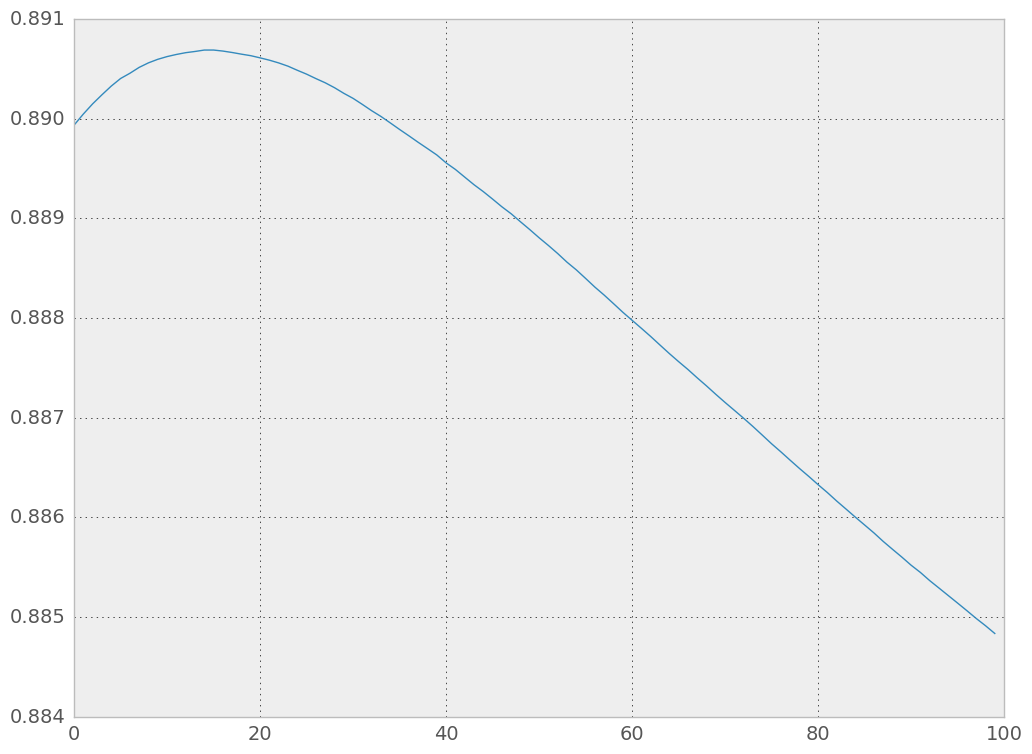

In [68]:

e = []
l = np.linspace(0,1,100)
for alpha in l:
    e.append(roc_auc_score(y, 0.31*a1 + 0.38*a2 + 0.12*a3 + 0.15*a4))
plt.plot(e)
print (l[np.argmax(e)])

## BIG

In [70]:
b = 0

for t in range(1, 11):
    print (t)
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": t + 0}
    a_tmp, _ = run_single(X, X2, y, None, params, num_boost_round=1000, test_size = -1)
    b += np.array(a_tmp)

1
2
3
4
5
6
7
8
9
10


In [71]:
b2 = 0

for t in range(1, 11):
    print (t)
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": t + 10}
    a_tmp, _ = run_single(X_norm, X2_norm, y_norm, None, params, num_boost_round=1000, test_size = -1)
    b2 += np.array(a_tmp)

1
2
3
4
5
6
7
8
9
10


In [72]:
b3 = 0

for t in range(1, 11):
    print (t)
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": t + 20}
    a_tmp, _ = run_single(X_sum, X2_sum, y_sum, None, params, num_boost_round=1000, test_size = -1)
    b3 += np.array(a_tmp)

1
2
3
4
5
6
7
8
9
10


In [73]:
b4 = 0

for t in range(1, 11):
    print (t)
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": t + 30}
    a_tmp, _ = run_single(X_sum_norm, X2_sum_norm, y_sum_norm, None, params, num_boost_round=1000, test_size = -1)
    b4 += np.array(a_tmp)

1
2
3
4
5
6
7
8
9
10


In [74]:
b1 = b/10
b2 = b2/10
b3 = b3/10
b4 = b4/10

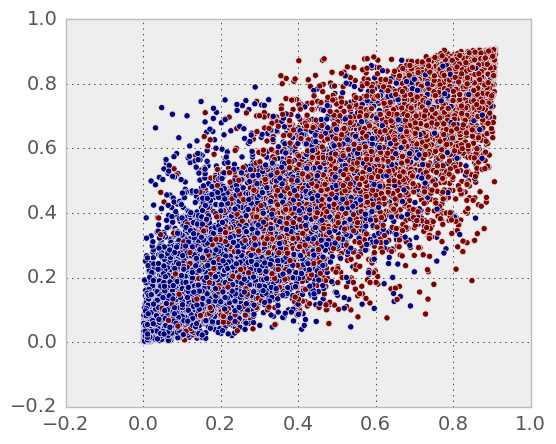

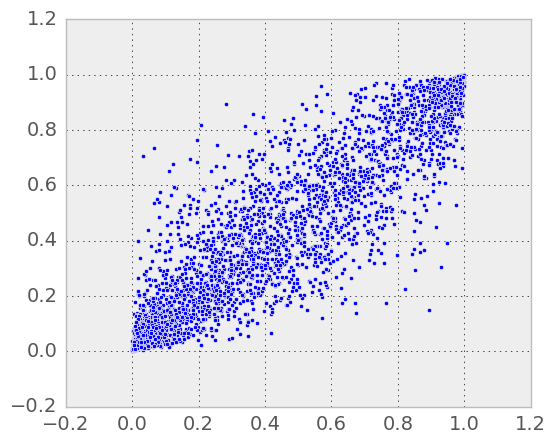

In [75]:
plt.figure(figsize=(6,5))
plt.scatter(a1, a4, 20, y)
plt.figure(figsize=(6,5))
plt.scatter(b1, b4, 10)

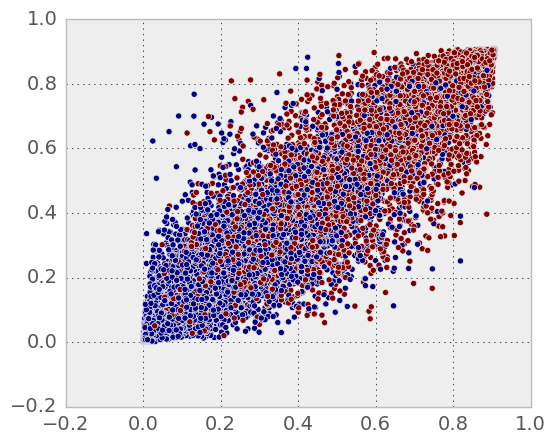

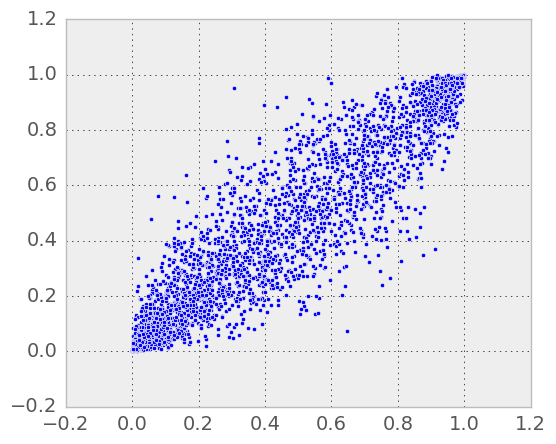

In [76]:
plt.figure(figsize=(6,5))
plt.scatter(a2, a3, 20, y)
plt.figure(figsize=(6,5))
plt.scatter(b2, b3, 10)

In [77]:
b_out = 0.31*b1 + 0.38*b2 + 0.12*b3 + 0.15*b4
b_out /= np.max(b_out)

In [55]:
df_out = pd.DataFrame({'customer_id': X2.customer_id.values, 'gender': b_out}, columns=['customer_id', 'gender'])
df_out.to_csv('outsider_z1_xgb_ens1.csv', index=False)
df_out[:5]

,customer_id,gender
0,78029866,0.249179
1,89720806,0.928625
2,41519597,0.800621
3,35234377,0.882612
4,22716068,0.365032


In [78]:
df_out = pd.DataFrame({'customer_id': X2.customer_id.values, 'gender': b_out}, columns=['customer_id', 'gender'])
df_out.to_csv('outsider_z1_xgb_ens2.csv', index=False)
df_out[:5]

,customer_id,gender
0,78029866,0.168961
1,89720806,0.936264
2,41519597,0.886507
3,35234377,0.885245
4,22716068,0.323711


In [81]:
df_out.shape[0]*0.16

480.0

In [83]:
bestfeatures = ['6010+158', '5992+219', '5533+204', '5814+217', '5812+197', '5812+217', '5921+315', '5977+146', '5921+394', '5977+203', '5921+273', '5211+314', '5812+282', '5812+394', '5921+272', '5814+177', '5812+22', '5977+205', '5533+272', '5814+152', '5812+204', '5812+177', '5651+394', '5533+314', '5812+162', '5977+396', '5921+396', '5812+92', '5812+29', '5977+91', '5977+145', '5977+204', '5977+27', '5812+315', '5812+93', '5983+218', '5814+26', '5921+154', '5812+94', '5921+28', '5992+197', '5921+152', '5211+30', '5814+153', '5533+24', '5983+315', '5921+276', '5999+219', '5977+282', '5691+394', '5983+314', '5977+393', '5921+156', '5921+206', '5814+155', '5921+93', '5977+196', '7995+315', '5533+273', '5944+218', '5533+197', '5944+152', '5533+217', '5983+217', '5921+158', '5921+159', '5812+154', '5533+395', '5812+163', '5691+30', '5977+395', '5691+204', '7994+217', '5983+272', '5945+151', '5661+28', '5983+393', '5983+152', '5983+151', '5211+272', '5533+22', '5983+203', '7311+152', '5977+29', '5921+196', '5812+95', '5691+22', '5691+158', '5812+152', '5983+219', '5211+276', '5977+281', '5977+315', '5533+396', '4816+395', '5921+162', '5977+23', '5977+273', '5992+218', '5691+196', '5983+157', '5661+27', '5533+28', '5921+160', '5921+163', '5621+393', '5983+91', '5977+274', '5661+394', '5977+26', '5944+151', '5211+275', '5261+274', '5983+204', '5211+315', '5977+28', '5533+91', '4816+396', '5211+394', '7994+197', '5533+25', '5977+164', '5211+24', '5992+217', '5983+280', '5921+24', '5211+203', '7994+280', '5977+161', '5211+95', '7311+164', '5983+274', '7995+151', '5691+203', '5211+91', '5977+394', '5977+25', '5661+273', '5533+393', '7311+29', '5641+396', '5533+161', '5983+281', '5941+152', '5661+274', '5983+196', '5533+274', '5977+31', '5983+396', '5533+282', '5921+146', '5983+145', '7832+197', '5812+153', '5661+395', '5200+146', '5983+95', '5261+29', '5691+146', '5722+280', '5651+29', '7994+315', '5983+158', '7311+153', '5983+282', '5921+94', '5211+27', '5983+394', '5211+164', '7311+162', '5200+157', '5921+161', '5983+273', '5651+314', '5983+29', '5211+31', '5813+205', '5211+94', '5983+30', '5699+394', '7311+28', '7311+95', '5983+23', '5661+314', '7994+203', '5533+23', '5211+28', '7311+26', '5651+204', '5983+94', '7311+177', '5651+273', '5533+280', '5983+31', '5732+218', '5921+26', '5732+280', '5941+275', '5651+177', '5651+395', '5641+395', '5641+26', '5977+155', '5983+177', '5533+95', '5533+276', '5533+29', '7311+315', '7994+154', '5983+93', '5921+25', '5977+163', '6012+395', '5983+159', '5651+272', '5983+28', '5964+282', '4812+217', '5533+158', '5732+91', '5533+218', '5722+156', '6012+393', '7311+93', '4812+315', '5533+394', '7994+314', '5699+395', '5533+145', '5661+151', '5211+273', '5261+163', '5977+30', '5735+92', '5941+146', '5945+203', '7994+274', '5732+152', '8099+280', '5533+315', '5661+146', '5722+395', '7311+155', '5533+160', '5941+30', '5921+153', '5983+206', '5983+146', '7311+160', '5651+26', '5533+164', '7832+196', '7994+206', '5732+146', '5992+196', '5722+146', '4812+218', '7311+159', '5661+196', '5533+92', '7995+218', '5964+25', '5983+27', '5211+146', '5722+145', '5621+29', '5983+197', '5977+162', '4816+272', '5964+93', '5722+27', '6012+272', '6012+204', '5261+273', '7832+160', '7995+273', '5983+164', '5261+160', '4812+159', '5735+152', '5983+92', '5399+196', '5651+203', '5533+155', '5983+275', '5983+22', '5944+219', '5813+93', '5722+282', '5712+218', '5983+163', '5983+155', '7995+272', '5699+177', '5941+25', '4816+92', '7311+163', '7399+393', '8999+164', '5211+145', '5983+160', '5983+24', '7399+197', '5661+217', '4900+396', '5211+25', '5533+163', '5941+280', '7994+281', '5941+281', '5964+27', '5699+25', '4812+145', '5983+161', '5983+162', '5621+315', '5983+205', '5995+396', '5964+315', '7994+218', '5533+157', '5732+196', '7995+152', '5735+164', '5977+156', '5941+274', '5533+203', '5261+94', '5941+276', '5964+274', '4812+276', '6012+164', '8641+218', '5712+22', '7994+196', '5533+196', '5651+94', '5651+155', '6012+218', '5261+272', '5941+28', '5964+164', '5735+145', '5211+29', '5699+151', '4812+95', '5533+146', '5735+275', '7399+154', '5732+25', '4812+154', '5699+155', '5621+146', '4812+25', '5983+156', '7311+24', '8641+219', '5964+160', '5691+164', '5621+275', '5941+93', '6012+280', '5651+156', '7994+151', '4812+26', '5735+158', '5261+280', '7311+280', '5621+151', '5651+24', '5732+27', '5699+282', '5261+145', '5641+163', '5722+276', '7994+273', '5732+93', '5699+154', '5651+196', '5722+161', '5699+93', '5533+152', '5735+30', '7994+204', '8999+159', '8999+160', '5732+95', '5735+160', '5983+276', '5641+31', '5941+23', '5533+281', '8099+393', '7995+275', '5261+159', '5983+25', '7832+315', '5732+219', '5699+28', '4812+22', '4812+273', '5533+275', '5732+164', '5813+281', '5983+153', '5735+157', '5945+31', '6012+273', '4112+275', '5699+315', '5651+161', '5732+156', '7832+162', '5533+94', '6012+92', '5813+218', '5651+217', '5699+161', '5533+206', '5651+91', '7399+164', '5699+196', '5533+30', '4812+92', '5661+158', '5533+205', '5641+145', '5211+159', '5651+154', '5533+151', '5621+22', '5813+314', '7311+25', '5943+394', '5621+30', '5735+159', '7399+145', '5813+393', '5941+163', '6012+25', '7995+393', '5533+156', '5735+162', '6012+197', '7832+93', '5995+217', '4816+153', '7995+274', '7995+203', '5722+93', '5533+26', '7995+25', '6012+281', '7995+314', '5621+395', '7995+156', '7995+394', '5533+31', '5621+204', '7995+205', '5735+395', '5699+22', '6012+315', '5651+162', '5735+146', '7995+281', '7311+23', '7995+157', '5621+206', '5999+153', '5261+281', '5621+394', '7995+196', '5735+163', '5735+161', '7995+92', '7995+282', '7995+146', '5735+155', '5735+94', '7995+155', '7995+217', '7995+280', '7995+396', '7995+276', '7995+24', '7995+145', '7995+164', '7995+197', '7995+163', '7995+177', '7995+162', '7995+204', '7995+161']

## настраиваем параметры

In [98]:
for nr in [600, 800, 1000, 1200, 1400]:
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": 3}
    d = runtest(X, y, params, num_boost_round=nr, nfolds=5, cv_randomstate=10)
    print (nr, roc_auc_score(y, d))
    
print ('---')

for nr in [600, 800, 1000, 1200, 1400]:
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 4,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": 3}
    d = runtest(X, y, params, num_boost_round=nr, nfolds=5, cv_randomstate=10)
    print (nr, roc_auc_score(y, d))
    
    
print ('---')

for nr in [600, 800, 1000, 1200, 1400]:
    params = {
    "objective": "binary:logistic",
    "booster" : "gbtree",
    "eval_metric": "auc",
    "eta": 0.05,
    "tree_method": 'exact',
    "max_depth": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "silent": 1,
    "seed": 3}
    d = runtest(X, y, params, num_boost_round=nr, nfolds=5, cv_randomstate=10)
    print (nr, roc_auc_score(y, d))   

(600, 0.88219037903885444)
(800, 0.88295339278577134)
(1000, 0.8825345249572869)
(1200, 0.88224972861925743)
(1400, 0.88191118543635616)
---
(600, 0.88152376612841743)
(800, 0.88152953779064824)
(1000, 0.88116765456877455)
(1200, 0.8806754725527336)
(1400, 0.88045730372040798)
---
(600, 0.87971291414210406)
(800, 0.88170902240880233)
(1000, 0.88218711312266518)
(1200, 0.88266645670954891)
(1400, 0.88264997227912867)


In [ ]:
(600, 0.88219037903885444)
(800, 0.88295339278577134) *
(1000, 0.8825345249572869)
(1200, 0.88224972861925743)
(1400, 0.88191118543635616)
---
(600, 0.88152376612841743)
(800, 0.88152953779064824) *
(1000, 0.88116765456877455)
(1200, 0.8806754725527336)
(1400, 0.88045730372040798)
---
(600, 0.87971291414210406)
(800, 0.88170902240880233)
(1000, 0.88218711312266518)
(1200, 0.88266645670954891) *
(1400, 0.88264997227912867)

In [127]:
params = {
"objective": "reg:linear",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 3}
d = runtest(X_norm, y_norm, params, num_boost_round=800, nfolds=5, cv_randomstate=10)
print (roc_auc_score(y, d)) 

0.872558023787


In [129]:
params = {
"objective": "reg:linear",
"booster" : "gbtree",
"eval_metric": "auc",
"eta": 0.05,
"tree_method": 'exact',
"max_depth": 3,
"subsample": 0.8,
"colsample_bytree": 0.8,
"silent": 1,
"seed": 3}
d = runtest(X_norm, y_norm, params, num_boost_round=400, nfolds=5, cv_randomstate=10)
print (roc_auc_score(y, d)) 

0.873372757259


In [124]:
xgb.__version__

'0.4'

In [180]:
a1 = pd.read_csv('outsider_z1_xgb_ens_f.csv')
a2 = pd.read_csv('outsider_z1_xgb_ens1.csv')
a3 = pd.read_csv('outsider_z1_xgb_ens2.csv')
a4 = pd.read_csv('outsider_z1_xgb4.csv')

a = (a1.gender + a2.gender + a3.gender + a4.gender) / 4
a[:3]

0    0.203929
1    0.925347
2    0.866179
Name: gender, dtype: float64

In [181]:
a1.gender = a

In [183]:
a.max()

0.99964515566824996

In [184]:
a1.to_csv('outsider_z1_xgb_all.csv', index=False)
a1[:5]

,customer_id,gender
0,78029866,0.203929
1,89720806,0.925347
2,41519597,0.866179
3,35234377,0.913864
4,22716068,0.315134
